# Task 2 : User Engagement Analysis 

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the dataset
df = pd.read_csv('telcom_data.csv')

In [3]:
# Convert spaces into underscore in column name of dataframe and Uppercase to lowercase

def new_columns(df):
    df.columns= [column.replace(' ', '_').lower() for column in df.columns]
    return df

In [4]:
df = new_columns(df)

In [5]:
df

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
0,1.311450e+19,04-04-2019 12:01,770.0,25-04-2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,15854611.0,2501332.00,8198936.00,9656251.00,278082303.0,1.434415e+07,171744450.0,8.814393e+06,36749741.0,308879636.0
1,1.311450e+19,09-04-2019 13:04,235.0,25-04-2019 08:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.00,18338413.00,17227132.00,608750074.0,1.170709e+06,526904238.0,1.505514e+07,53800391.0,653384965.0
2,1.311450e+19,09-04-2019 17:42,1.0,25-04-2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,19725661.0,14699576.00,17587794.00,6163408.00,229584621.0,3.956300e+05,410692588.0,4.215763e+06,27883638.0,279807335.0
3,1.311450e+19,10-04-2019 00:31,486.0,25-04-2019 07:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,21388122.0,15146643.00,13994646.00,1097942.00,799538153.0,1.084972e+07,749039933.0,1.279728e+07,43324218.0,846028530.0
4,1.311450e+19,12-04-2019 20:10,565.0,25-04-2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,15259380.0,18962873.00,17124581.00,415218.00,527707248.0,3.529801e+06,550709500.0,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277830e+18,29-04-2019 07:28,451.0,30-04-2019 06:02,214.0,81230.0,2.082020e+14,3.365069e+10,3.548310e+13,D20434A,...,16191667.0,11763428.00,17883703.00,19678161.00,526609673.0,9.197207e+06,3264510.0,1.348742e+07,57628851.0,574175259.0
149997,7.349880e+18,29-04-2019 07:28,483.0,30-04-2019 10:41,187.0,97970.0,2.082020e+14,3.366345e+10,3.566050e+13,D10223C,...,13877234.0,8288284.00,19350146.00,21293148.00,626893062.0,4.735033e+06,712180387.0,2.457758e+06,39135081.0,666648844.0
149998,1.311450e+19,29-04-2019 07:28,283.0,30-04-2019 10:46,810.0,98249.0,2.082020e+14,3.362189e+10,3.572120e+13,T51102A,...,22660510.0,1855903.00,9963942.00,5065760.00,553539484.0,1.339432e+07,121100856.0,1.131473e+07,34912224.0,592786405.0
149999,1.311450e+19,29-04-2019 07:28,696.0,30-04-2019 10:40,327.0,97910.0,2.082020e+14,3.361962e+10,8.618620e+13,L88342B,...,8817106.0,8305402.00,3322253.00,13172589.00,352536971.0,2.529475e+06,814713113.0,1.406930e+06,29626096.0,371895920.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   bearer_id                                 149010 non-null  float64
 1   start                                     150000 non-null  object 
 2   start_ms                                  150000 non-null  float64
 3   end                                       150000 non-null  object 
 4   end_ms                                    150000 non-null  float64
 5   dur._(ms)                                 150000 non-null  float64
 6   imsi                                      149431 non-null  float64
 7   msisdn/number                             148935 non-null  float64
 8   imei                                      149429 non-null  float64
 9   last_location_name                        148848 non-null  object 
 10  avg_rtt_dl_(ms)     

#### We need to combine the total UL and Dl data of each application


In [7]:
df["social_media"] = df["social_media_dl_(bytes)"] + df['social_media_ul_(bytes)']
df["google"] = df["google_dl_(bytes)"] + df["google_ul_(bytes)"]
df['email'] = df["email_dl_(bytes)"] + df["email_ul_(bytes)"]
df['youtube'] = df["youtube_dl_(bytes)"] + df["youtube_ul_(bytes)"]
df['netflix'] = df["netflix_dl_(bytes)"] + df["netflix_ul_(bytes)"]
df["gaming"] = df["gaming_dl_(bytes)"] + df["gaming_ul_(bytes)"]
df['other']= df["other_dl_(bytes)"]+ df["other_ul_(bytes)"]
df['total_data'] = df['total_dl_(bytes)'] + df['total_ul_(bytes)']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 63 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   bearer_id                                 149010 non-null  float64
 1   start                                     150000 non-null  object 
 2   start_ms                                  150000 non-null  float64
 3   end                                       150000 non-null  object 
 4   end_ms                                    150000 non-null  float64
 5   dur._(ms)                                 150000 non-null  float64
 6   imsi                                      149431 non-null  float64
 7   msisdn/number                             148935 non-null  float64
 8   imei                                      149429 non-null  float64
 9   last_location_name                        148848 non-null  object 
 10  avg_rtt_dl_(ms)     

In [9]:
df1 =df.rename(columns={'msisdn/number': 'msisdn', 'dur._(ms)': 'duration' })

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 63 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   bearer_id                                 149010 non-null  float64
 1   start                                     150000 non-null  object 
 2   start_ms                                  150000 non-null  float64
 3   end                                       150000 non-null  object 
 4   end_ms                                    150000 non-null  float64
 5   duration                                  150000 non-null  float64
 6   imsi                                      149431 non-null  float64
 7   msisdn                                    148935 non-null  float64
 8   imei                                      149429 non-null  float64
 9   last_location_name                        148848 non-null  object 
 10  avg_rtt_dl_(ms)     

In [11]:
# Aggregate the sessions frequency count for bearer id

session_count = df1.groupby('msisdn').agg({'bearer_id':'count'})
session_freq_metrics = session_count.sort_values(by=['bearer_id'],ascending=False)

In [12]:
session_freq_metrics.head(10)

,bearer_id
msisdn,
3.362632e+10,18
3.362578e+10,17
3.361489e+10,17
3.365973e+10,16
3.367588e+10,15
3.376054e+10,15
3.366716e+10,13
3.376041e+10,12
3.360452e+10,12


In [13]:
# Aggregate the sessions frequency count for duration

duration_count = df1.groupby('msisdn').agg({'duration':'sum'})
duration_metrics = duration_count.sort_values(by=['duration'],ascending=False)
duration_metrics.head(10)

,duration
msisdn,
3.362578e+10,18553754.0
3.361489e+10,9966898.0
3.376054e+10,9279434.0
3.362632e+10,8791927.0
3.366716e+10,8744914.0
3.366284e+10,6614270.0
3.366469e+10,6288730.0
3.360313e+10,6287761.0
3.366746e+10,5649882.0


In [14]:
# Aggregate the sessions frequency for total data

total_data_count = df1.groupby('msisdn').agg({'total_data':'sum'})
total_data_metrics = total_data_count.sort_values(by=['total_data'],ascending=False)
total_data_metrics.head(10)

,total_data
msisdn,
3.361489e+10,8.846226e+09
3.376054e+10,8.514774e+09
3.362578e+10,8.499621e+09
3.362632e+10,7.971167e+09
3.367588e+10,7.891111e+09
3.365973e+10,7.705863e+09
3.366646e+10,7.308501e+09
3.376041e+10,7.132371e+09
3.366471e+10,6.872018e+09


## Task 2.1

### • Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric.

### • Normalize each engagement metric and run a k-means (k=3) to classify customers into three groups of engagement

In [15]:
engagement_metrics = df1.groupby('msisdn').agg({'bearer_id': 'count','duration': 'sum', 'total_data': 'sum',})
engagement_metrics = engagement_metrics.rename(columns={'bearer_id': 'session_frequency', 'total_data': 'total_traffic'})
engagement_metrics.sort_values(by=['session_frequency'], ascending=False)

,session_frequency,duration,total_traffic
msisdn,,,
3.362632e+10,18,8791927.0,7.971167e+09
3.362578e+10,17,18553754.0,8.499621e+09
3.361489e+10,17,9966898.0,8.846226e+09
3.365973e+10,16,4035428.0,7.705863e+09
3.367588e+10,15,4865947.0,7.891111e+09
...,...,...,...
3.368163e+10,0,41900.0,5.197256e+08
3.376111e+10,0,39387.0,4.402640e+08
3.366740e+10,0,11882.0,1.714999e+08


In [16]:
engagement_metrics.describe().style.background_gradient(cmap = "Greens")

,session_frequency,duration,total_traffic
count,106856.000000,106856.000000,106856.000000
mean,1.389777,146167.156323,690962103.307751
std,0.809863,186358.669675,491055891.074222
min,0.000000,7142.000000,33249009.000000
25%,1.000000,71308.000000,358549907.500000
50%,1.000000,102740.000000,617923138.000000
75%,2.000000,172799.000000,857435147.750000
max,18.000000,18553754.000000,8846226494.000000


[Text(0.5, 1.0, 'Outlier detection for bearer_id count')]

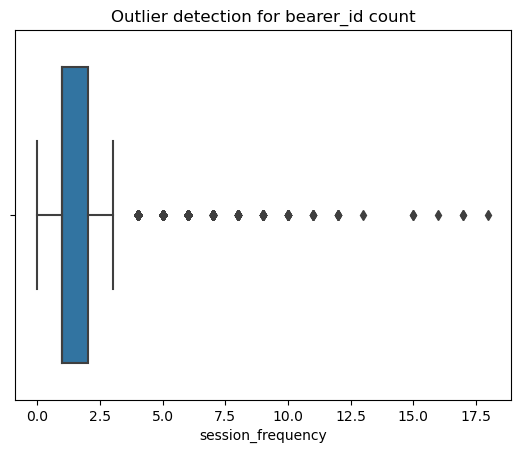

In [17]:
sns.boxplot(data=engagement_metrics, x='session_frequency').set(title="Outlier detection for bearer_id count")

[Text(0.5, 1.0, 'Outlier detection for Total duration')]

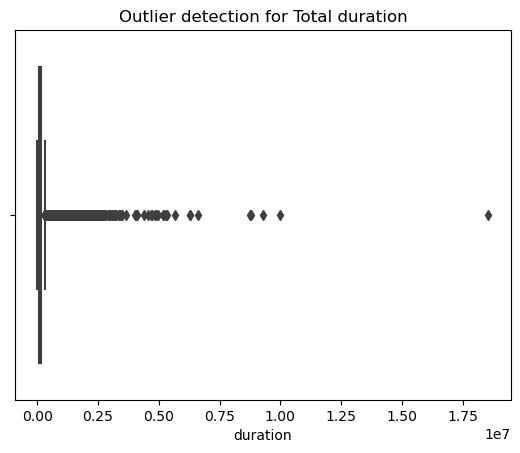

In [18]:
sns.boxplot(data=engagement_metrics, x='duration').set(title="Outlier detection for Total duration")

[Text(0.5, 1.0, 'Outlier detection for Total_data')]

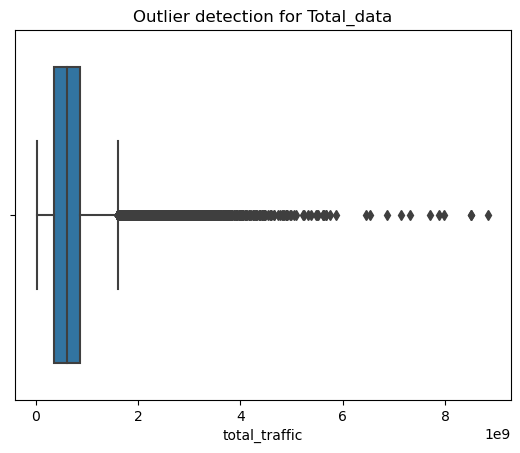

In [19]:
sns.boxplot(data=engagement_metrics, x='total_traffic').set(title="Outlier detection for Total_data")

* There are outliers present in above three metrics.
* We are dealing with the outliers in upcoming steps

In [20]:
def handle_outliers(df1, col):
    df1 = df1.copy()
    q1 = df1[col].quantile(0.25)
    q2 = df1[col].quantile(0.50)
    q3 = df1[col].quantile(0.75)
    
    iqr=q3-q1
    lower_range=q1-iqr*1.5
    upper_range=q3+iqr*1.5
    
    df1[col] = np.where(df1[col] < lower_range, lower_range, df1[col])
    df1[col] = np.where(df1[col] > upper_range, upper_range, df1[col])
    
    return df1

In [21]:
new_engagement_metrics = handle_outliers(engagement_metrics, 'session_frequency')
new_engagement_metrics = handle_outliers(new_engagement_metrics, 'duration')
new_engagement_metrics = handle_outliers(new_engagement_metrics, 'total_traffic')

In [22]:
new_engagement_metrics.describe().style.background_gradient(cmap = "Oranges")

,session_frequency,duration,total_traffic
count,106856.000000,106856.000000,106856.000000
mean,1.355572,130253.994394,663626341.975427
std,0.658101,87611.985353,395927394.547047
min,0.000000,7142.000000,33249009.000000
25%,1.000000,71308.000000,358549907.500000
50%,1.000000,102740.000000,617923138.000000
75%,2.000000,172799.000000,857435147.750000
max,3.500000,325035.500000,1605763008.125000


[Text(0.5, 1.0, 'Outlier detection for bearer_id count')]

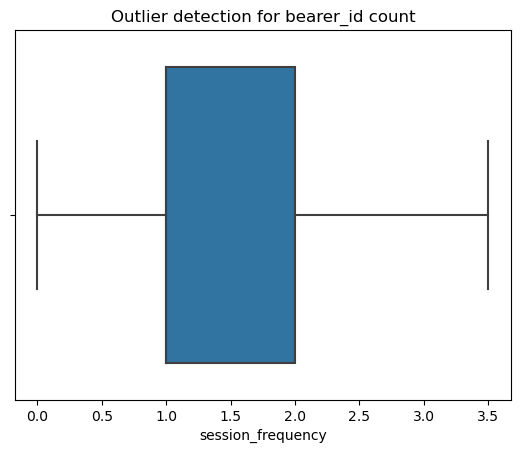

In [23]:
sns.boxplot(data=new_engagement_metrics, x='session_frequency').set(title="Outlier detection for bearer_id count")

[Text(0.5, 1.0, 'Outlier detection for Total duration')]

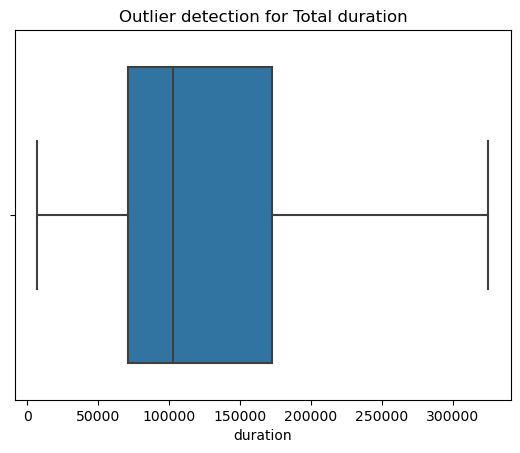

In [24]:
sns.boxplot(data=new_engagement_metrics, x='duration').set(title="Outlier detection for Total duration")

[Text(0.5, 1.0, 'Outlier detection for Total_data')]

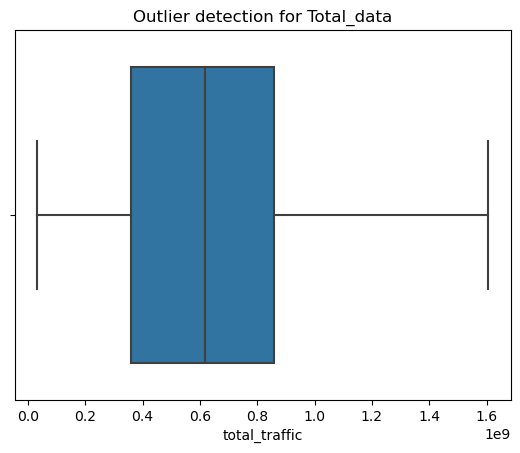

In [25]:
sns.boxplot(data=new_engagement_metrics, x='total_traffic').set(title="Outlier detection for Total_data")

### • Plot the top 3 most used applications using appropriate charts.

In [26]:
app_metrics = []

app_columns = ['social_media', 'google', 'email', 'youtube', 'netflix', 'gaming']

app_metrics = df1.groupby('msisdn').agg({'social_media': 'sum', 'google': 'sum', 'email': 'sum',
                                        'youtube': 'sum', 'netflix': 'sum', 'gaming': 'sum'})

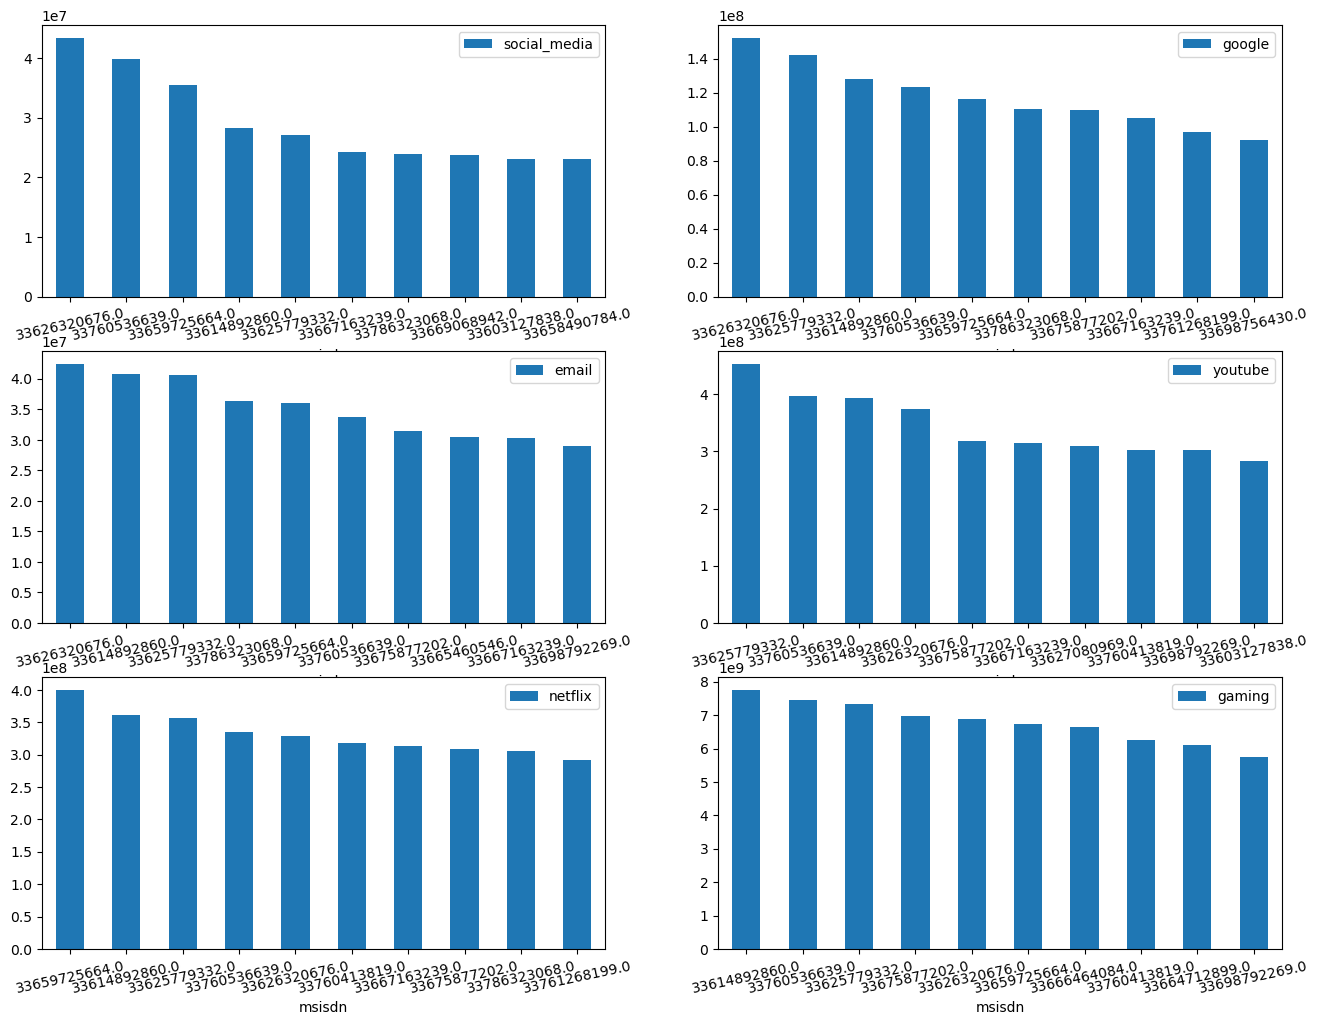

In [27]:
figure, axes = plt.subplots(3, 2, figsize=(16,12))

count = 0
for app_metric in app_metrics:
    
    x = app_metrics[[app_metric]].sort_values(by = [app_metric],
                                              ascending=False).head(10)
    x.plot.bar(y=app_metric, ax=axes[(count//2), count%2], rot=12)
    count += 1

In [28]:
total_app_df = pd.DataFrame(columns=['app', 'total'])
total_app_df['app'] = app_columns

app_metrics
apps_total = []

for app in app_columns:
    apps_total.append(app_metrics.sum()[app])
total_app_df['total'] =apps_total
    
total_app_df

,app,total
0,social_media,2.722655e+11
1,google,1.162853e+12
2,email,3.364677e+11
3,youtube,3.372204e+12
4,netflix,3.370060e+12
5,gaming,6.408892e+13


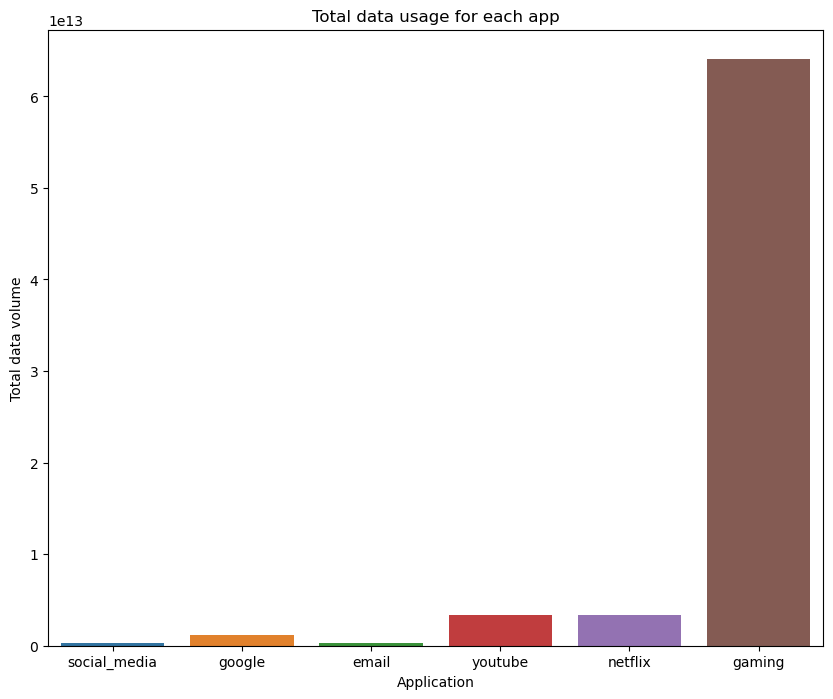

In [29]:
# Plot the results
plt.figure(figsize=(10,8))
sns.barplot(data=total_app_df, x='app', y='total')
plt.xlabel("Application")
plt.ylabel("Total data volume")
plt.title("Total data usage for each app")
plt.show()

## Normalize each engagement metric and run a k-means (k=3) to classify customers into three groups of engagement.

In [30]:
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.cluster import KMeans

In [31]:
metrics_to_normalize = new_engagement_metrics[['session_frequency', 'duration', 'total_traffic']]  # Specify the columns to normalize
scaler = MinMaxScaler()

norm_metrics = scaler.fit_transform(metrics_to_normalize)
normalized_metrics = pd.DataFrame(norm_metrics, columns=metrics_to_normalize.columns)
print(normalized_metrics)

        session_frequency  duration  total_traffic
0                0.285714  0.344700       0.537637
1                0.285714  0.547630       0.078607
2                0.285714  0.402106       0.357846
3                0.285714  0.134435       0.247420
4                0.571429  0.094252       0.905659
...                   ...       ...            ...
106851           0.285714  0.005247       0.433314
106852           0.285714  0.421040       0.284295
106853           0.285714  1.000000       0.126469
106854           0.285714  0.773492       0.358050
106855           0.285714  1.000000       0.067347

[106856 rows x 3 columns]


In [32]:
normalized_metrics.describe().style.background_gradient(cmap = "Blues")

,session_frequency,duration,total_traffic
count,106856.000000,106856.000000,106856.000000
mean,0.387306,0.387274,0.400872
std,0.188029,0.275602,0.251780
min,0.000000,0.000000,0.000000
25%,0.285714,0.201847,0.206867
50%,0.285714,0.300723,0.371809
75%,0.571429,0.521108,0.524120
max,1.000000,1.000000,1.000000


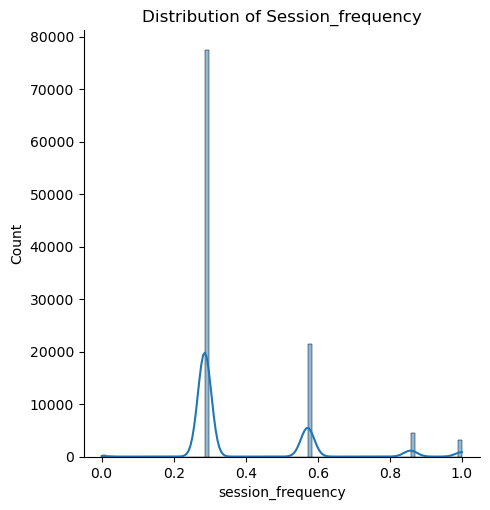

In [33]:
sns.displot(data=normalized_metrics, x='session_frequency',kde=True).set(title="Distribution of Session_frequency")

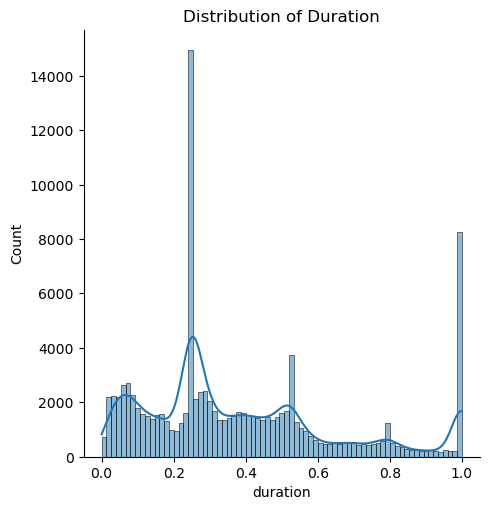

In [34]:
sns.displot(data=normalized_metrics, x='duration',kde=True).set(title="Distribution of Duration")

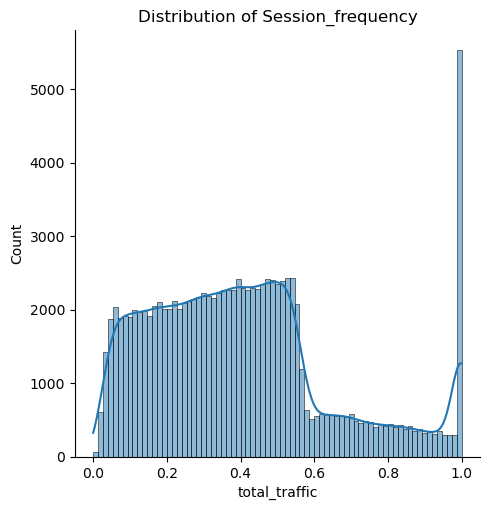

In [35]:
sns.displot(data=normalized_metrics, x='total_traffic',kde=True).set(title="Distribution of Session_frequency")

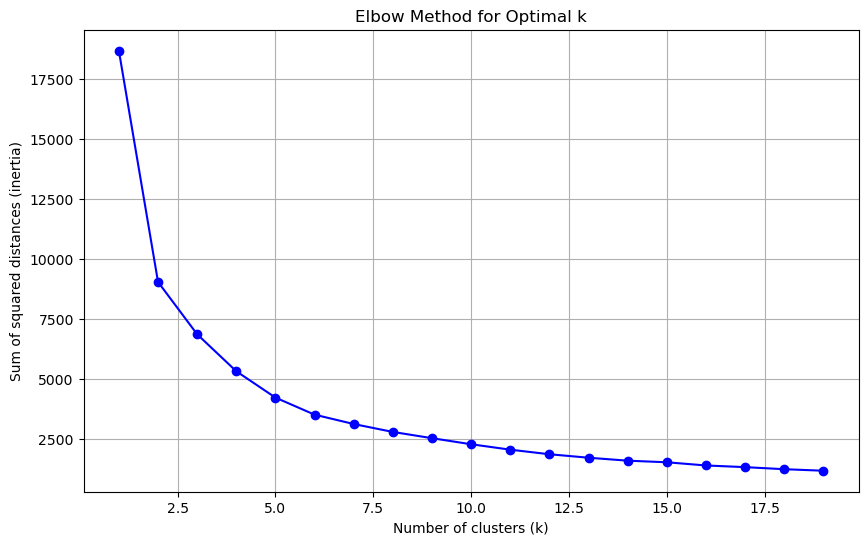

In [36]:
# Elbow Method :

# Define a range of k values to evaluate
k_values = range(1, 20)  # try different values of k from 1 to 20

# Initialize a list to store the inertia values
inertia_values = []

# Iterate over each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    kmeans.fit(normalized_metrics)
    inertia_values.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(k_values, inertia_values,'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (inertia)')
plt.title('Elbow Method for Optimal k')
plt.grid()


* From the results of the above method, we select :

* k : Clusters = 3

In [37]:
kmeans = KMeans(n_clusters=3, init='k-means++').fit(normalized_metrics)
pred = kmeans.predict(normalized_metrics)

engagement_metrics_with_cluster = new_engagement_metrics.copy()
engagement_metrics_with_cluster['clusters'] = pred

In [38]:
print(engagement_metrics_with_cluster['clusters'])

msisdn
3.360100e+10    0
3.360100e+10    2
3.360100e+10    2
3.360101e+10    0
3.360101e+10    0
               ..
3.379000e+10    0
3.379000e+10    2
3.197020e+12    2
3.370000e+14    2
8.823970e+14    2
Name: clusters, Length: 106856, dtype: int32


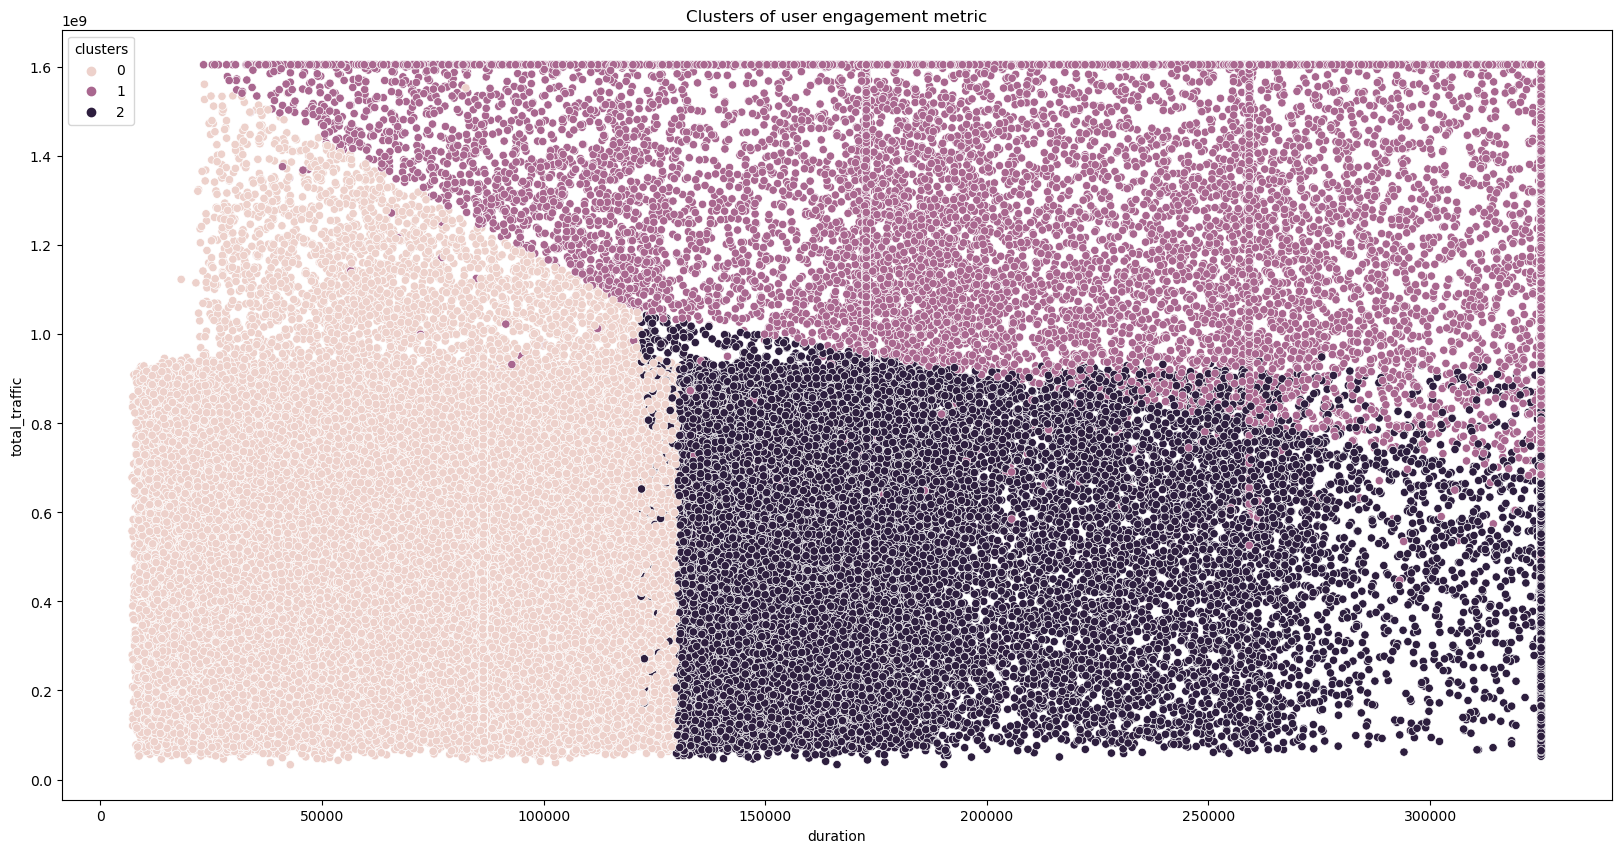

0    61136
2    27473
1    18247
Name: clusters, dtype: int64

In [39]:
engagement_metrics_with_cluster['clusters'].value_counts()

plt.figure(figsize=(20,10))

sns.scatterplot(x = 'duration', y='total_traffic', hue='clusters',
                data=engagement_metrics_with_cluster).set_title('Clusters of user engagement metric')
plt.show()

engagement_metrics_with_cluster['clusters'].value_counts()

In [40]:
cluster_1 =  engagement_metrics_with_cluster[engagement_metrics_with_cluster['clusters'] == 0]
cluster_2 =  engagement_metrics_with_cluster[engagement_metrics_with_cluster['clusters'] == 1]
cluster_3 =  engagement_metrics_with_cluster[engagement_metrics_with_cluster['clusters'] == 2]

In [41]:
cluster_1.describe()

,session_frequency,duration,total_traffic,clusters
count,61136.000000,61136.000000,6.113600e+04,61136.0
mean,1.081032,69602.293542,5.296574e+08,0.0
std,0.295617,32741.943222,2.684800e+08,0.0
min,0.000000,7142.000000,3.324901e+07,0.0
25%,1.000000,37694.750000,3.057410e+08,0.0
50%,1.000000,84946.500000,5.285076e+08,0.0
75%,1.000000,90244.250000,7.418736e+08,0.0
max,3.000000,134947.000000,1.561850e+09,0.0


In [42]:
cluster_2.describe()

,session_frequency,duration,total_traffic,clusters
count,18247.000000,18247.000000,1.824700e+04,18247.0
mean,2.507590,246303.747301,1.319219e+09,1.0
std,0.619489,79122.856724,2.646159e+08,0.0
min,1.000000,23292.000000,4.070312e+08,1.0
25%,2.000000,176843.000000,1.102156e+09,1.0
50%,2.000000,259198.000000,1.352154e+09,1.0
75%,3.000000,325035.500000,1.605763e+09,1.0
max,3.500000,325035.500000,1.605763e+09,1.0


In [43]:
cluster_3.describe()

,session_frequency,duration,total_traffic,clusters
count,27473.000000,27473.000000,2.747300e+04,27473.0
mean,1.201361,188145.107196,5.263176e+08,2.0
std,0.402746,53190.980117,2.419568e+08,0.0
min,0.000000,121825.000000,3.357584e+07,2.0
25%,1.000000,150370.000000,3.225737e+08,2.0
50%,1.000000,171969.000000,5.402893e+08,2.0
75%,1.000000,211867.000000,7.329407e+08,2.0
max,3.000000,325035.500000,1.042663e+09,2.0


### Task 4.1 A
We need to save the engagement metrics for Task 4

In [44]:
cluster_counts = engagement_metrics_with_cluster['clusters'].value_counts()

engagement_metrics_with_cluster.to_csv('engagement_metrics_with_cluster.csv', index=False)

In [45]:
cluster_counts.to_csv('cluster_counts.csv')

* Engagement score to each user

In [46]:
kmeans

KMeans(n_clusters=3)

In [47]:
distance = kmeans.fit_transform(normalized_metrics)

distance_from_less_engagement = list(map(lambda x : x[0], distance))

engagement_metrics_with_cluster['score'] = distance_from_less_engagement

In [48]:
engagement_metrics_with_cluster['msisdn'] = engagement_metrics_with_cluster.index
engagement_metrics_with_cluster.head()

,session_frequency,duration,total_traffic,clusters,score,msisdn
msisdn,,,,,,
3.360100e+10,1.0,116720.0,8.786906e+08,0,0.323478,3.360100e+10
3.360100e+10,1.0,181230.0,1.568596e+08,2,0.239063,3.360100e+10
3.360100e+10,1.0,134969.0,5.959665e+08,2,0.181270,3.360100e+10
3.360101e+10,1.0,49878.0,4.223207e+08,0,0.441580,3.360101e+10
3.360101e+10,2.0,37104.0,1.457411e+09,0,0.794951,3.360101e+10


In [49]:
csv_file_path = 'engagement_metrics.csv'

# Save the DataFrame to a CSV file
engagement_metrics_with_cluster.to_csv(csv_file_path, index=False)